In [1]:
import xarray as xr

In [13]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.geometry import shape
import shapefile as shp

res = 'l'
sf = shp.Reader(f'/home/chsu/data/gshhg-shp-2/GSHHS_shp/{res}/GSHHS_{res}_L1')


print("Total number of features: %i"%len(sf.shapeRecords()))


Total number of features: 5706


In [55]:
import numpy as np
x_list = []
y_list = []
x_lim = [-130,-115]
y_lim = [35,40]
for nf,feature in enumerate(sf.shapeRecords()):
    x=[]
    y=[]
    for i in feature.shape.points[:]:
        if i[0]>=x_lim[0] and i[0]<=x_lim[-1] and i[1]>=y_lim[0] and i[1]<=y_lim[-1]:
            if nf == 3:
                x.append(i[0])
                y.append(i[1])
    x_list += x
    y_list += y

x_list = np.array(x_list)
y_list = np.array(y_list)
x_list_new = np.concatenate([x_list[0:15],x_list[27:]])
y_list_new = np.concatenate([y_list[0:15],y_list[27:]])


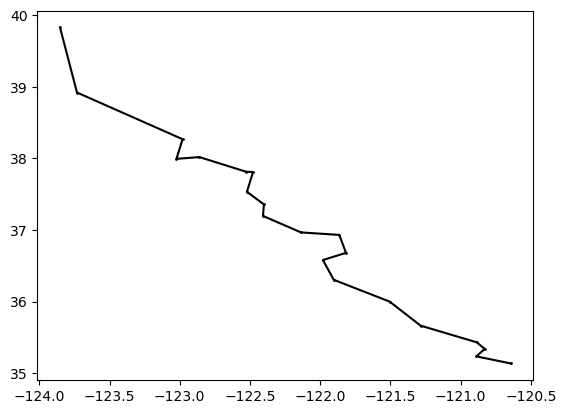

In [56]:
import matplotlib.pyplot as plt
plt.plot(x_list_new,y_list_new,'ko-',markersize=1)

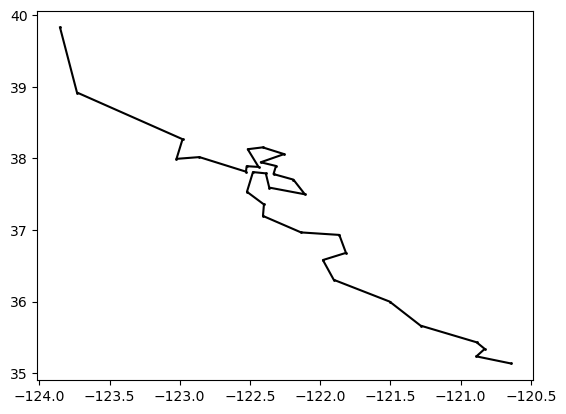

In [57]:
import matplotlib.pyplot as plt
plt.plot(x_list,y_list,'ko-',markersize=1)

In [58]:
import numpy as np

def deg_to_rad(degree):
    return degree*np.pi/180.

def rad_to_deg(radian):
    return radian*180./np.pi

def distance_along_lat(delta_longitude,latitude):
    earth_radius = 6371.  # km
    delta_distance = (
        earth_radius
        *np.cos(deg_to_rad(latitude))
        *deg_to_rad(delta_longitude)
    )
    return delta_distance

def delta_lon_along_lat(delta_distance,latitude):
    earth_radius = 6371.  # km
    delta_longitude_rad = (
        delta_distance/earth_radius/np.cos(deg_to_rad(latitude))
    )

    return rad_to_deg(delta_longitude_rad)


In [59]:
distance_along_lat(1,1)

111.17799111864606

In [60]:
delta_lon_along_lat(150,45)

1.9077492180381308

In [61]:
deg_to_rad(90.) - np.pi/2.

0.0

In [62]:
rad_to_deg(np.pi)

180.0

In [63]:
deg_to_rad(np.array([180,90,0]))

array([3.14159265, 1.57079633, 0.        ])

In [64]:
def polygon_off_coast(distance,lon_list,lat_list,eastward_ext=False):
    if eastward_ext:
        lon_list_extend = lon_list + delta_lon_along_lat(distance,lat_list)
    else: 
        lon_list_extend = lon_list - delta_lon_along_lat(distance,lat_list)
    lon_list_poly = np.concatenate([lon_list,lon_list_extend[::-1],np.array([lon_list[0]])])
    lat_list_poly = np.concatenate([lat_list,lat_list[::-1],np.array([lat_list[0]])])

    return {
        'lon':lon_list_poly,
        'lat':lat_list_poly
    }

In [68]:
dict_poly_150 = polygon_off_coast(150.,x_list_new,y_list_new,eastward_ext=False)
dict_poly_75 = polygon_off_coast(75.,x_list_new,y_list_new,eastward_ext=False)

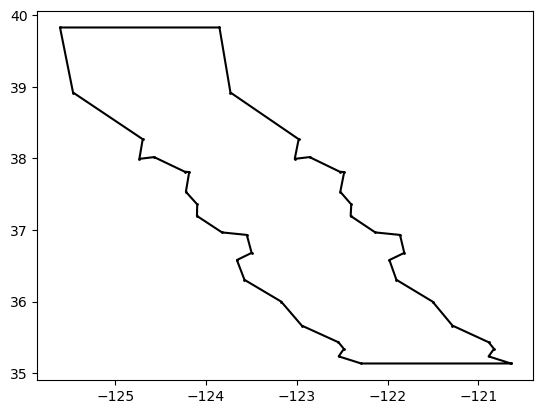

In [69]:
import matplotlib.pyplot as plt
plt.plot(dict_poly_150['lon'],dict_poly_150['lat'],'ko-',markersize=1)


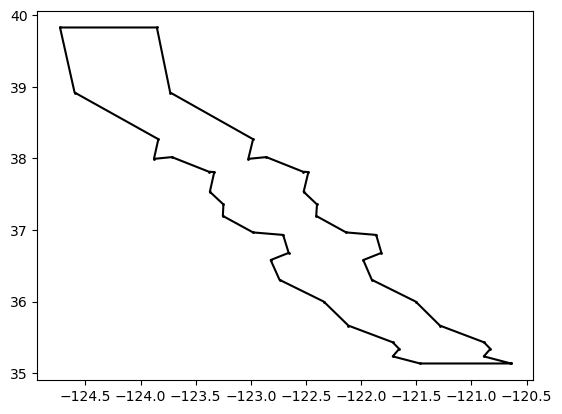

In [70]:
import matplotlib.pyplot as plt
plt.plot(dict_poly_75['lon'],dict_poly_75['lat'],'ko-',markersize=1)


Total number of features: 5706


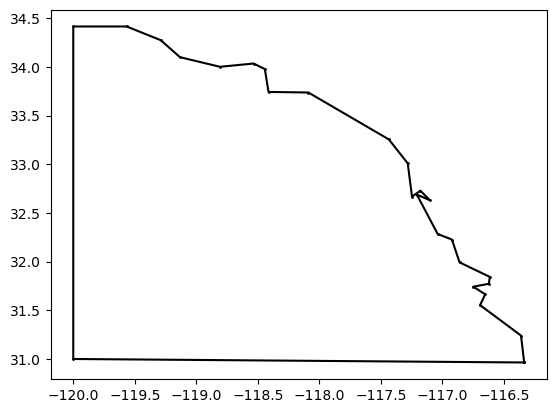

In [96]:
import numpy as np
res = 'l'
sf = shp.Reader(f'/home/chsu/data/gshhg-shp-2/GSHHS_shp/{res}/GSHHS_{res}_L1')


print("Total number of features: %i"%len(sf.shapeRecords()))
x_list = []
y_list = []
x_lim = [-120.45,-115]
y_lim = [30.9,36]
outpoint = [-120,31]
for nf,feature in enumerate(sf.shapeRecords()):
    x=[]
    y=[]
    for i in feature.shape.points[:]:
        if i[0]>=x_lim[0] and i[0]<=x_lim[-1] and i[1]>=y_lim[0] and i[1]<=y_lim[-1]:
            if nf == 3:
                x.append(i[0])
                y.append(i[1])
    x_list += x
    y_list += y

x_list = np.array(x_list)
y_list = np.array(y_list)
x_list_new = np.concatenate([x_list,np.array([outpoint[0]]),np.array([outpoint[0]]),np.array([x_list[0]])])
y_list_new = np.concatenate([y_list,np.array([y_list[-1]]),np.array([outpoint[1]]),np.array([y_list[0]])])
import matplotlib.pyplot as plt
plt.plot(x_list_new,y_list_new,'ko-',markersize=1)